In [1]:
import pandas as pd # Importing modules for use.
import numpy as np
import matplotlib.pyplot as plt # For plotting scatter plot

In [2]:
# Set the plotting DPI settings to be a bit higher.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 200

# Decision Tree Classification

In [3]:
# API doc:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [4]:
data = pd.read_csv('Altman_Z_2D.csv') # Load the .csv data

In [5]:
data.head(5) # Taking a look at the data.

,Bankrupt,EBIT/Total Assets,MktValEquity/Debt
0,False,27.693875,8.415582
1,False,-14.302305,8.878080
2,True,-20.515623,-8.742365
3,False,29.729424,4.878042
4,False,32.856383,1.107730


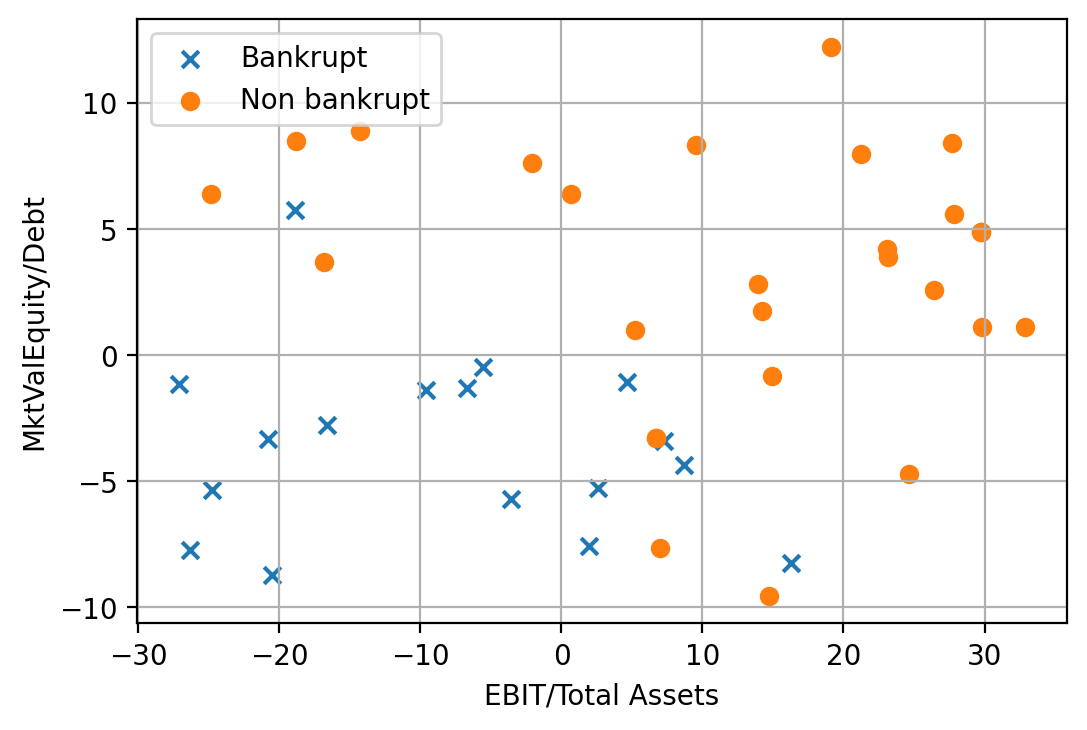

In [6]:
# Bankruptcy mask (list of booleans)
bankrupt_mask = data['Bankrupt']==True

# Plot the bankrupt points
plt.scatter(data['EBIT/Total Assets'][bankrupt_mask],\
            data['MktValEquity/Debt'][bankrupt_mask],\
           marker='x')

# Plot the nonbankrupt points
plt.scatter(data['EBIT/Total Assets'][~bankrupt_mask],\
            data['MktValEquity/Debt'][~bankrupt_mask],\
           marker='o')

# Formatting
plt.xlabel('EBIT/Total Assets')
plt.ylabel('MktValEquity/Debt')
plt.grid()
plt.legend(['Bankrupt','Non bankrupt']);

In [7]:
# Split up the data for the classifier to be trained.

X = data[['EBIT/Total Assets',
          'MktValEquity/Debt']] # X is the feature data

y = data['Bankrupt'] # y is the outcome we predict.

In [30]:
# Import scikitlearn
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier object.
tree_clf = DecisionTreeClassifier(max_depth=2) 

# Fit decision tree to training data.
tree_clf.fit(X, y)
#tree_clf.fit(X.to_numpy(), y.to_numpy()) # Optional convert to numpy arrays

DecisionTreeClassifier(max_depth=2)

In [31]:
# Let's see if it predicts bankruptcy for a bad company
print('Low EBIT/Total Assets and MktValEquity/Debt company go bust?', 
      tree_clf.predict([[-20, -10]]))

# Let's try this for a highly values, high earning company
print('High EBIT/Total Assets and MktValEquity/Debt company go bust?', 
      tree_clf.predict([[20, 10]]))

Low EBIT/Total Assets and MktValEquity/Debt company go bust? [ True]
High EBIT/Total Assets and MktValEquity/Debt company go bust? [False]


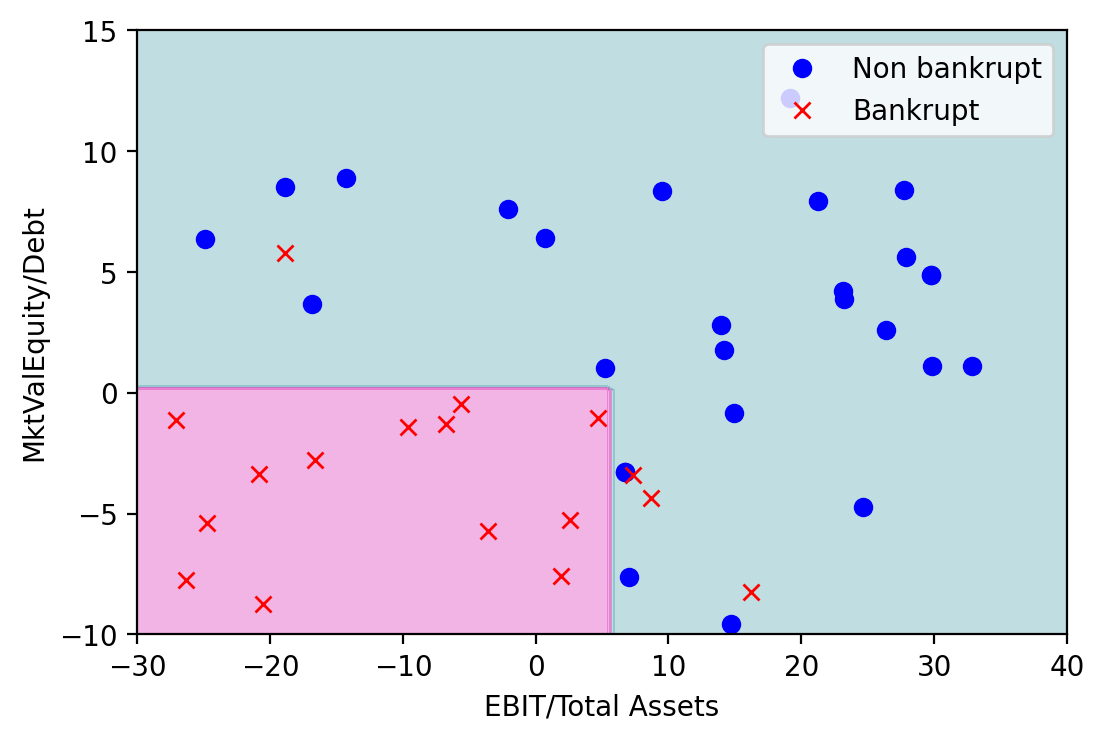

In [35]:
# Contour plot data
from matplotlib.colors import ListedColormap
x1s = np.linspace(-30, 40, 100)
x2s = np.linspace(-10, 15, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['#2F939F',
                              '#D609A8'])

# Plot and formatting
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X['EBIT/Total Assets'][y==False], 
         X['MktValEquity/Debt'][y==False],
         'bo', 
         X['EBIT/Total Assets'][y==True], 
         X['MktValEquity/Debt'][y==True],
         'rx')
plt.xlabel('EBIT/Total Assets')
plt.ylabel('MktValEquity/Debt')

# Legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='b', marker='o', lw=0, label='Non bankrupt'),
                   Line2D([0], [0], color='r', marker='x', lw=0, label='Bankrupt')];
plt.legend(handles=legend_elements, loc='upper right');

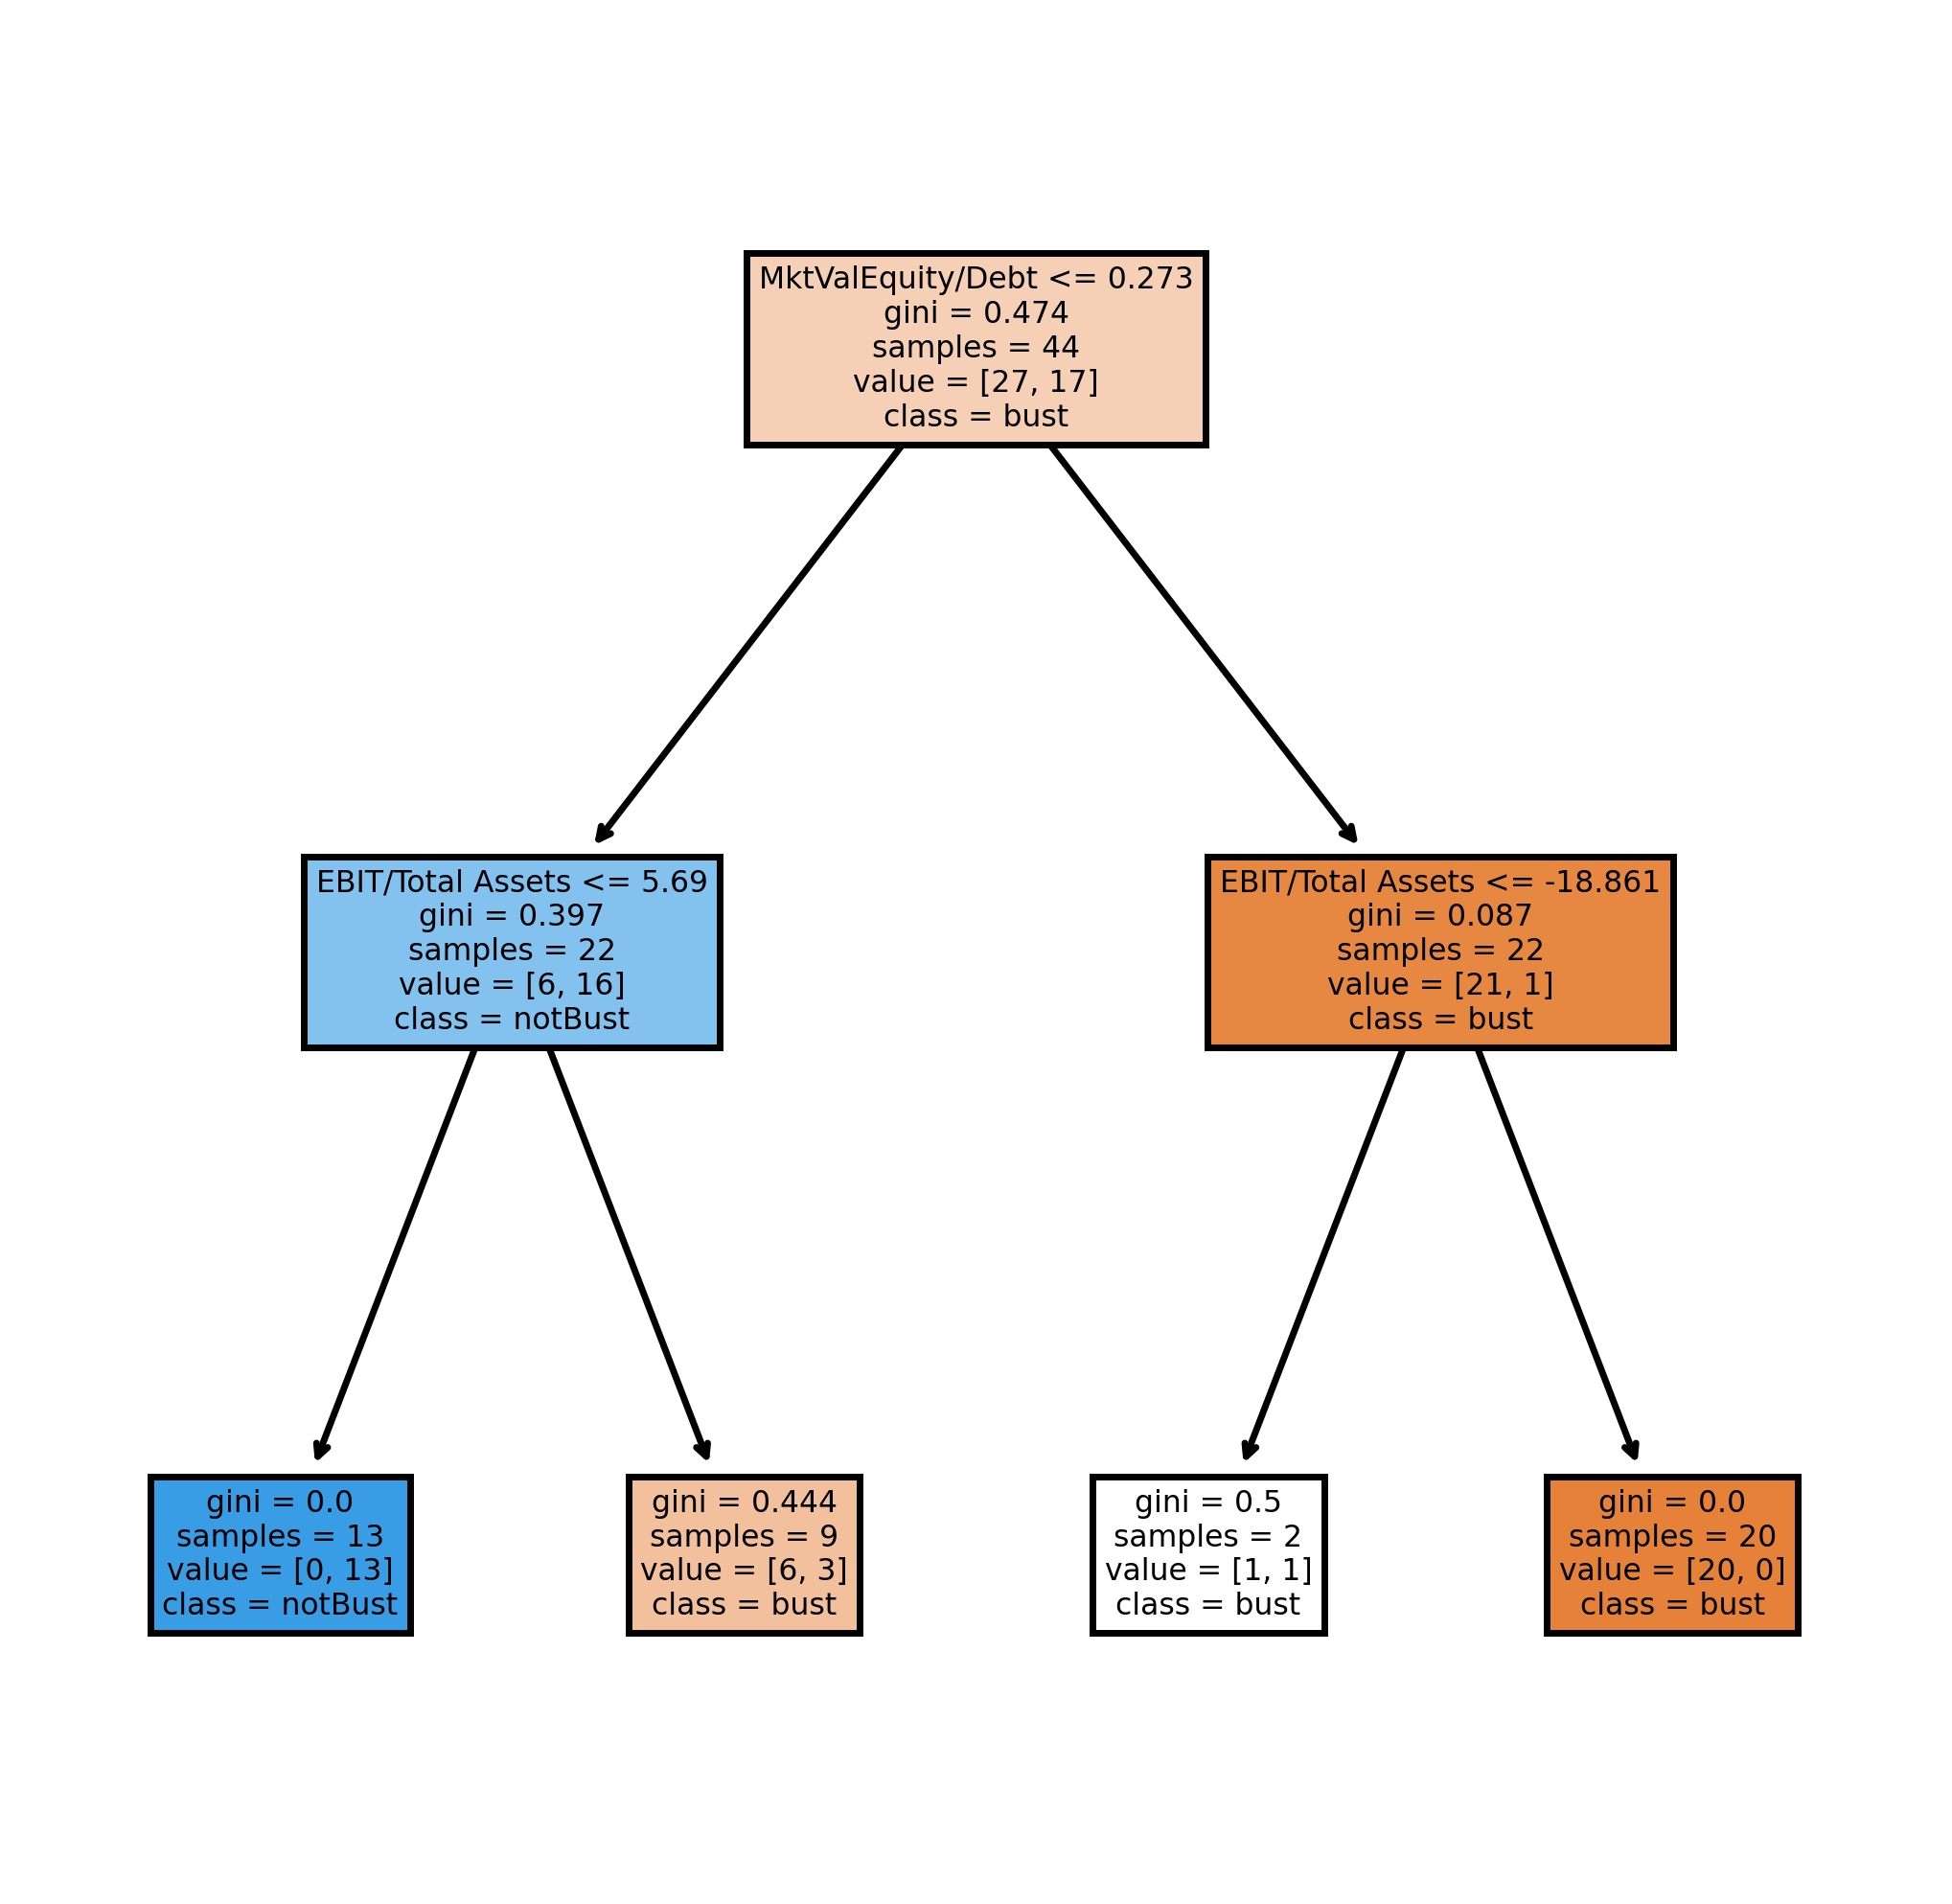

In [34]:
from sklearn import tree # Need this to see decision tree.
plt.figure(figsize=(5,5), dpi=500) # set figsize so we can see it

tree.plot_tree(tree_clf,
               feature_names=['EBIT/Total Assets','MktValEquity/Debt'], 
               class_names=['bust', 'notBust'],
               filled = True);

In [12]:
#plt.savefig('tree.png')

# Test/train splitting

In [39]:
# Test/train splitting
from sklearn.model_selection import train_test_split # need to import
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=2)

In [40]:
# Have a look at the train and test sets.
print('X_train data size:', X_train.shape)
print('X_test data size:', X_test.shape)
print('y_train data size:', y_train.shape)
print('y_test data size:', y_test.shape)

X_train data size: (29, 2)
X_test data size: (15, 2)
y_train data size: (29,)
y_test data size: (15,)


In [43]:
 # create second a DecisionTreeClassifier object
tree_clf2 = DecisionTreeClassifier(max_depth=2)

# Fit the decision tree to our TRAINING data of X and y.
tree_clf2.fit(X_train, y_train)
tree_clf2.fit(X_train.to_numpy(), y_train.to_numpy()) # Optional trail with numpy arrays instead of DataFrames

# Now want to plot the contour plot again

DecisionTreeClassifier(max_depth=2)

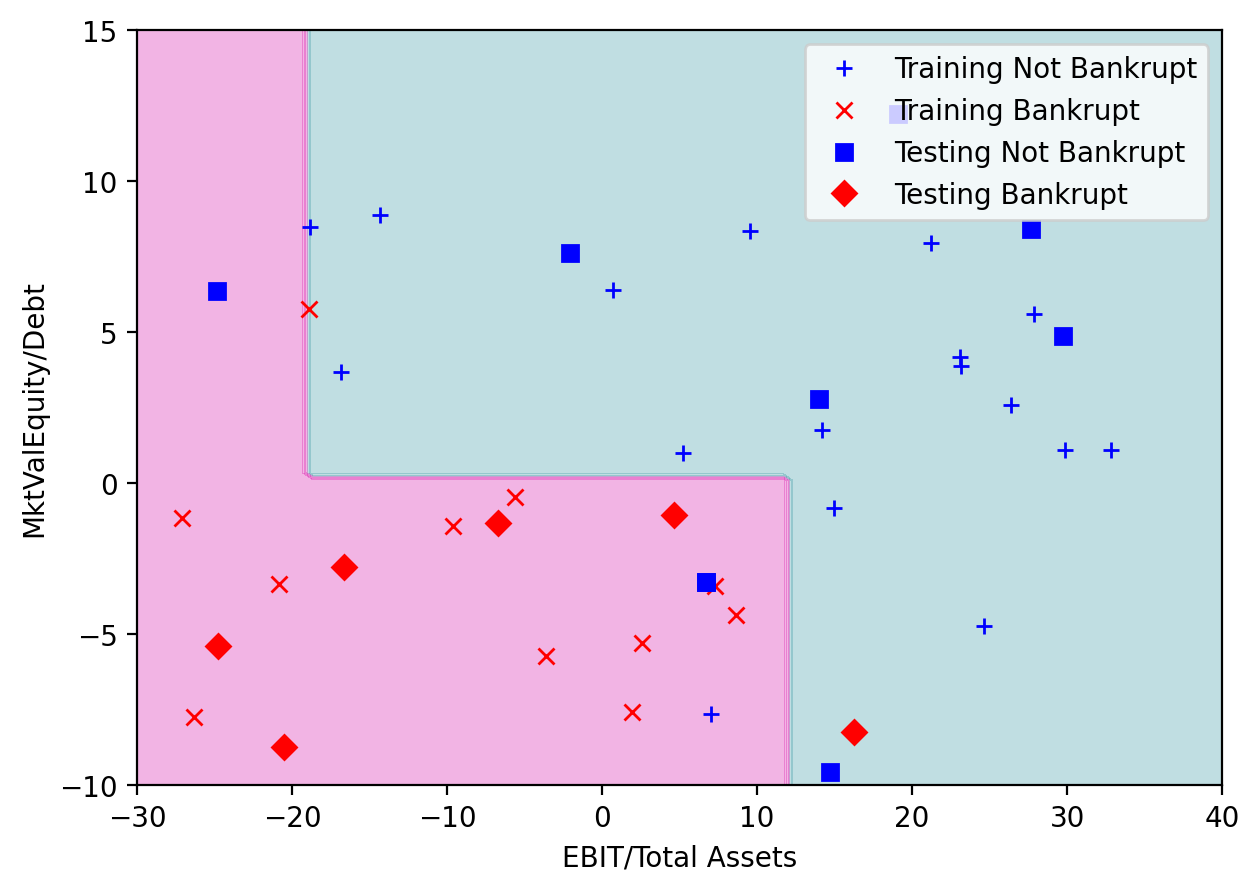

In [44]:
# Contour plot with scatter points of training and testing data
from matplotlib.colors import ListedColormap
x1s = np.linspace(-30, 40, 100)
x2s = np.linspace(-10, 15, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf2.predict(X_new).astype(int).reshape(x1.shape)
custom_cmap = ListedColormap(['#2F939F','#D609A8'])

plt.figure(figsize=(7,5))
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X_train['EBIT/Total Assets'][y==False], X_train['MktValEquity/Debt'][y==False], "b+",
         X_train['EBIT/Total Assets'][y==True], X_train['MktValEquity/Debt'][y==True], "rx",
         X_test['EBIT/Total Assets'][y==False], X_test['MktValEquity/Debt'][y==False], "bs",
         X_test['EBIT/Total Assets'][y==True], X_test['MktValEquity/Debt'][y==True], "rD")
plt.xlabel('EBIT/Total Assets')
plt.ylabel('MktValEquity/Debt')

# Legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='b', marker='+', lw=0, label='Training Not Bankrupt'),
                   Line2D([0], [0], color='r', marker='x', lw=0, label='Training Bankrupt'),
                   Line2D([0], [0], color='b', marker='s', lw=0, label='Testing Not Bankrupt'),
                   Line2D([0], [0], color='r', marker='D', lw=0, label='Testing Bankrupt')];
plt.legend(handles=legend_elements, loc='upper right');

# Cross Validation and Measuring Classification Performance
### K-fold CV (Cross-Validation)

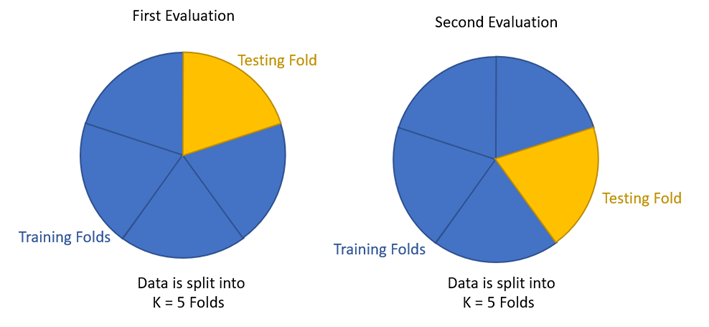

In [45]:
# Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clf2, X, y, cv=3, scoring='accuracy')

print('Accuracy scores for the 3 models are:', scores)

Accuracy scores for the 3 models are: [0.8        0.8        0.85714286]


In [46]:
from sklearn.model_selection import cross_val_predict
scores = cross_val_predict(tree_clf2, X, y, cv=3) # First get the predictions of Trues and Falses

from sklearn.metrics import confusion_matrix
confusion_matrix(scores, y) # Compare these predictions with the known correct answers 

array([[27,  8],
       [ 0,  9]], dtype=int64)

### Shufflesplit CV

In [47]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clf2, 
                         X, y, 
                         cv=ShuffleSplit(n_splits=5,
                                         random_state=42,
                                         test_size=0.25,
                                         train_size=None), 
                         scoring='accuracy')

In [48]:
scores

array([0.72727273, 0.72727273, 0.81818182, 0.81818182, 0.72727273])

# Hyperparameters, Underfitting and Overfitting

In [49]:
# If you want to view the large dataset plotted
#data = pd.read_csv('Altman_Z_2D_Large.csv', index_col=0) # Load the .csv data
#colours = np.where(data['Bankrupt'], 'r', 'b') # here we define separate colours for True and False
#data.plot.scatter(x='EBIT/Total Assets', y='MktValEquity/Debt', c = colours); # Have to specify X and Y in Scatterplots

In [52]:
def plotGraph(X_train, X_test, y, tree_clf2):
    '''
    Just a quick plotting function for the Decision Tree contour plots
    '''
    # Now want to plot the contour plot again
    # Contour plot with scatter points of training and testing data
    from matplotlib.colors import ListedColormap
    x1s = np.linspace(-30, 40, 100)
    x2s = np.linspace(-10, 15, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree_clf2.predict(X_new).astype(int).reshape(x1.shape)
    custom_cmap = ListedColormap(['#2F939F','#D609A8'])

    plt.figure(figsize=(7,5))
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    plt.plot(X_train['EBIT/Total Assets'][y==False], 
             X_train['MktValEquity/Debt'][y==False], "b+",
             X_train['EBIT/Total Assets'][y==True], 
             X_train['MktValEquity/Debt'][y==True], "rx",
             X_test['EBIT/Total Assets'][y==False], 
             X_test['MktValEquity/Debt'][y==False], "bs",
             X_test['EBIT/Total Assets'][y==True], 
             X_test['MktValEquity/Debt'][y==True], "rD")
    
    plt.xlabel('EBIT/Total Assets')
    plt.ylabel('MktValEquity/Debt')
    # Legend
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='b', marker='+', lw=0, label='Training Not Bankrupt'),
                       Line2D([0], [0], color='r', marker='x', lw=0, label='Training Bankrupt'),
                       Line2D([0], [0], color='b', marker='s', lw=0, label='Testing Not Bankrupt'),
                       Line2D([0], [0], color='r', marker='D', lw=0, label='Testing Bankrupt')];
    plt.legend(handles=legend_elements, loc='upper right');

## Try Different Hyperparameter max_depth values

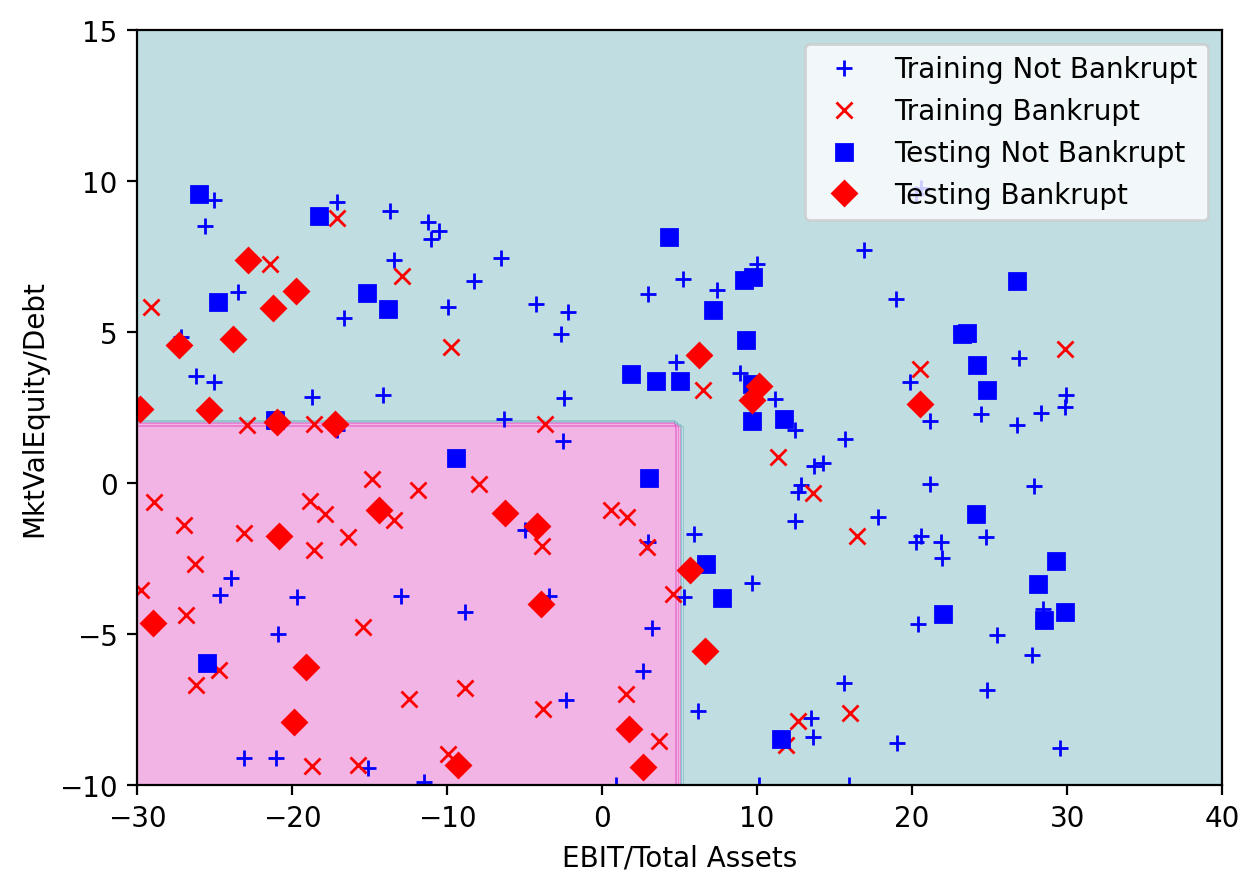

In [54]:
# Trying different max_depth values visually
data = pd.read_csv('Altman_Z_2D_Large.csv', 
                   index_col=0) # Load the .csv data
X_large = data[['EBIT/Total Assets','MktValEquity/Debt']]
y_large = data['Bankrupt']

# Test/train splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_large, y_large, 
                                                    test_size=0.3, 
                                                    random_state=2) # can edit random_state

 # create second a DecisionTreeClassifier object
tree_clf2 = DecisionTreeClassifier(max_depth=2) # Change this

# Fit the decision tree to our TRAINING data of X and y.
#tree_clf2.fit(X_train, y_train)
tree_clf2.fit(X_train.to_numpy(), y_train.to_numpy())

plotGraph(X_train, X_test, y_large, tree_clf2)

# Exercise 7 on Decision Trees

In [ ]:
# Oh no, Toby has messed up the code again. Try and get it working,
# I think some code is missing where "?" is placed.

In [ ]:
'''
Here we want to plot the prediction accuracy with increasing decision tree depth
We want two accuracy lines plotted, one for accuracy vs. the testing set and
one for the accuracy vs the training set. 

We want to plot the tree depth from 1 to about 20.
We will loop through possible tree depth numbers, fitting our model with a different
tree depth with each loop, and appending the accuracy result to a list.

We will plot the list at the end.
'''


from sklearn.metrics import accuracy_score
scores_train, scores_test = [], ?
level = 20
for i in range(1, ?):
    tree_clf = DecisionTreeClassifier(max_depth=?) # create a DecisionTreeClassifier object first
    tree_clf.fit(?, y_train) # Fit the decision tree to our training data of X and Y.
    scores_train.append(?, y_train))
    scores_test.?(accuracy_score(tree_clf.predict(X_test), y_test)

plt.plot(range(1,level), scores_, range(1,?), scores_)
plt.legend(('Accuracy on Training Set','Accuracy on Testing Set'))
plt.grid()
#plt.xlabel('Decision Tree Depth')
plt.ylabel('Prediction Accuracy')